In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools

import pandas as pd

def extractMolFromSDFById(sdf: str, id: str, col_id: str) -> pd.DataFrame:
    # extract molecule from sdf by id
    sdf = PandasTools.LoadSDF(sdf, molColName='ROMol')
    moldf = sdf[sdf[col_id] == id]
    return moldf

In [3]:
file = '/chemotargets/research/SITALA/IPTACOPAN/03.Known/cfb.chembl.sdf'
ID = 'CHEMBL4594448'

df = extractMolFromSDFById(file, ID, 'chembl_id')

,molecule_name,target_name,organism,chembl_id,activity_info,pACT,ID,ROMol
5,IPTACOPAN,Complement factor B,Homo sapiens,CHEMBL4594448,IC50: 7.07|Kd: 8.10,7.327500000000001,RENRQMCACQEWFC-UGKGYDQZSA-N,

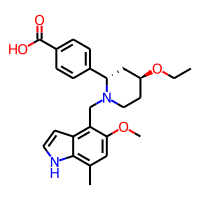

In [4]:
df

In [17]:
Chem.PandasTools.WriteSDF(df, f'{ID}.sdf', molColName='ROMol', properties=list(df.columns))

In [6]:
ref = PandasTools.LoadSDF('/chemotargets/research/SITALA/IPTACOPAN/step1_PREPARATION_str/6rav-pdb-bundle1.JGQ.A.303.sdf', molColName='ROMol')

In [8]:
Chem.rdMolAlign.CalcRMS(df['ROMol'],ref['ROMol'])

ArgumentError: Python argument types in
    rdkit.Chem.rdMolAlign.CalcRMS(Series, Series)
did not match C++ signature:
    CalcRMS(RDKit::ROMol {lvalue} prbMol, RDKit::ROMol {lvalue} refMol, int prbId=-1, int refId=-1, boost::python::api::object map=None, int maxMatches=1000000, boost::python::api::object weights=[])